# Iššūkis: Teksto analizė apie duomenų mokslą

> *Šiame užrašų knygelėje eksperimentuojame su skirtingais URL - Vikipedijos straipsniu apie Mašininį Mokymąsi. Galite pastebėti, kad, skirtingai nei Duomenų Mokslas, šiame straipsnyje yra daug terminų, todėl analizė tampa sudėtingesnė. Turime sugalvoti kitą būdą, kaip išvalyti duomenis po raktažodžių ištraukimo, kad atsikratytume kai kurių dažnų, bet nereikšmingų žodžių junginių.*

Šiame pavyzdyje atliksime paprastą pratimą, apimantį visus tradicinio duomenų mokslo proceso etapus. Jums nereikia rašyti jokio kodo, tiesiog spustelėkite žemiau esančias langelius, kad juos vykdytumėte ir stebėtumėte rezultatą. Kaip iššūkį, skatiname išbandyti šį kodą su skirtingais duomenimis.

## Tikslas

Šioje pamokoje aptarėme įvairias su Duomenų Mokslu susijusias sąvokas. Pabandykime atrasti daugiau susijusių sąvokų atlikdami **teksto gavybą**. Pradėsime nuo teksto apie Duomenų Mokslą, ištrauksime raktažodžius ir tada bandysime vizualizuoti rezultatą.

Kaip tekstą naudosime Vikipedijos puslapį apie Duomenų Mokslą:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## 1 žingsnis: Duomenų gavimas

Pirmasis žingsnis kiekviename duomenų mokslo procese yra duomenų gavimas. Tam naudosime `requests` biblioteką:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## 2 žingsnis: Duomenų transformavimas

Kitas žingsnis – konvertuoti duomenis į formą, tinkamą apdorojimui. Mūsų atveju, mes atsisiuntėme HTML šaltinio kodą iš puslapio, ir turime jį paversti į paprastą tekstą.

Yra daug būdų, kaip tai galima padaryti. Mes naudosime paprasčiausią įmontuotą [HTMLParser](https://docs.python.org/3/library/html.parser.html) objektą iš Python. Reikia paveldėti `HTMLParser` klasę ir apibrėžti kodą, kuris surinks visą tekstą iš HTML žymių, išskyrus `<script>` ir `<style>` žymes.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## 3 žingsnis: Įžvalgų gavimas

Svarbiausias žingsnis yra paversti mūsų duomenis į formą, iš kurios galėtume gauti įžvalgų. Mūsų atveju norime išgauti raktažodžius iš teksto ir pamatyti, kurie raktažodžiai yra reikšmingesni.

Naudosime Python biblioteką, vadinamą [RAKE](https://github.com/aneesha/RAKE), raktažodžių išgavimui. Pirmiausia įdiekime šią biblioteką, jei ji dar nėra įdiegta:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Pagrindinė funkcionalumas pasiekiamas per `Rake` objektą, kurį galime pritaikyti naudodami tam tikrus parametrus. Mūsų atveju nustatysime minimalią raktažodžio ilgį iki 5 simbolių, minimalią raktažodžio dažnį dokumente iki 3, o maksimalų žodžių skaičių raktažodyje - iki 2. Drąsiai eksperimentuokite su kitomis reikšmėmis ir stebėkite rezultatą.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Gavome sąrašą terminų kartu su jų svarbos laipsniu. Kaip matote, svarbiausios disciplinos, tokios kaip mašininis mokymasis ir didieji duomenys, yra sąrašo viršuje.

## 4 žingsnis: Rezultatų vizualizavimas

Žmonės geriausiai interpretuoja duomenis vizualine forma. Todėl dažnai verta vizualizuoti duomenis, kad būtų galima gauti tam tikrų įžvalgų. Galime naudoti `matplotlib` biblioteką Python kalboje, kad nupieštume paprastą raktinių žodžių pasiskirstymą pagal jų svarbą:


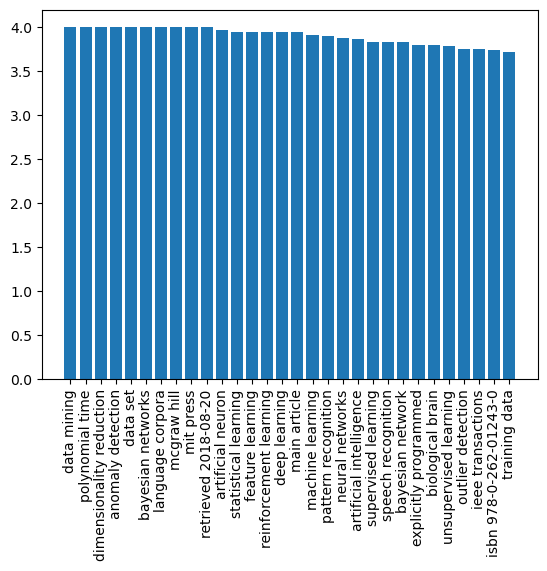

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

Yra, tačiau, dar geresnis būdas vizualizuoti žodžių dažnius - naudojant **Žodžių Debesį**. Mums reikės įdiegti kitą biblioteką, kad galėtume sudaryti žodžių debesį iš mūsų raktažodžių sąrašo.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud` objektas yra atsakingas už tai, kad priimtų arba originalų tekstą, arba iš anksto apskaičiuotą žodžių sąrašą su jų dažniais, ir grąžintų vaizdą, kurį vėliau galima parodyti naudojant `matplotlib`:


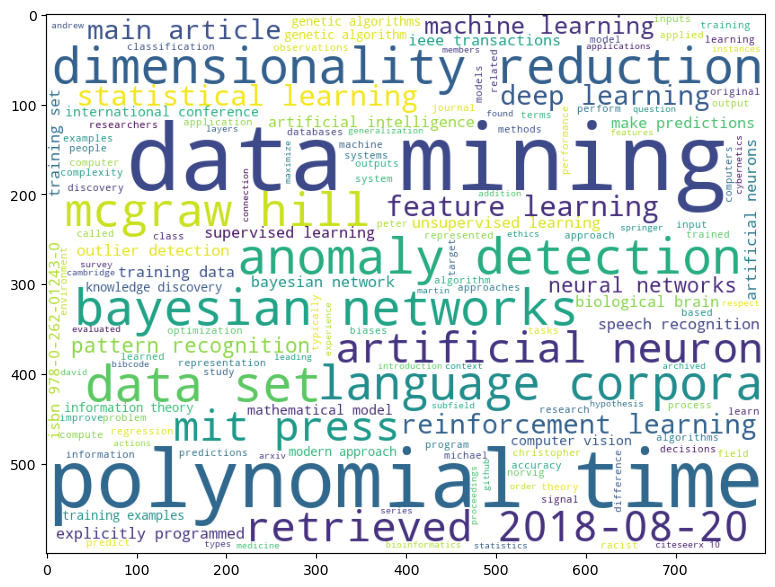

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

Mes taip pat galime perduoti originalų tekstą į `WordCloud` - pažiūrėkime, ar galime gauti panašų rezultatą:


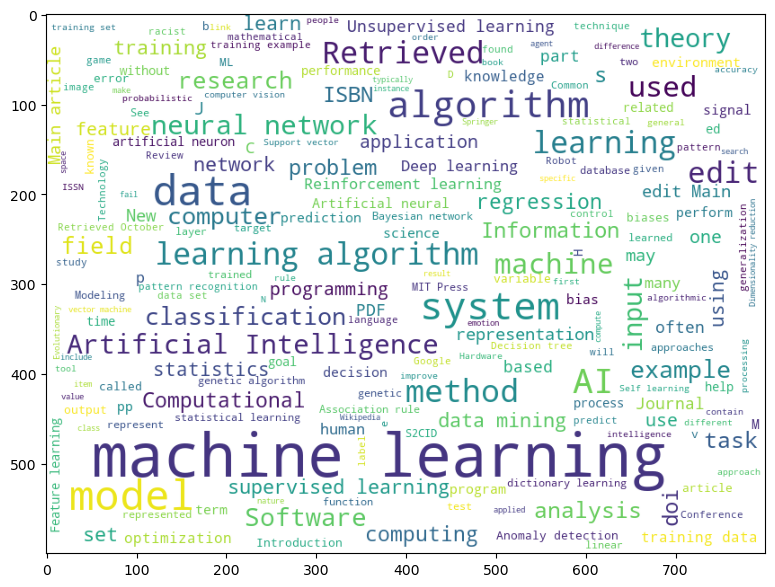

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Dabar galite matyti, kad žodžių debesis atrodo įspūdingiau, tačiau jame taip pat yra daug triukšmo (pvz., nesusiję žodžiai, tokie kaip `Retrieved on`). Be to, gauname mažiau dviejų žodžių raktinių frazių, tokių kaip *duomenų mokslininkas* ar *kompiuterių mokslas*. Taip yra todėl, kad RAKE algoritmas daug geriau atrenka tinkamus raktinius žodžius iš teksto. Šis pavyzdys parodo, kaip svarbu tinkamai apdoroti ir išvalyti duomenis, nes aiškus vaizdas pabaigoje leis priimti geresnius sprendimus.

Šioje užduotyje mes perėjome paprastą procesą, kaip išgauti prasmę iš „Wikipedia“ teksto, naudojant raktinius žodžius ir žodžių debesį. Šis pavyzdys yra gana paprastas, tačiau jis gerai iliustruoja visus tipinius žingsnius, kuriuos duomenų mokslininkas atlieka dirbdamas su duomenimis – pradedant nuo duomenų gavimo ir baigiant vizualizacija.

Mūsų kurse mes išsamiai aptarsime visus šiuos žingsnius.



---

**Atsakomybės apribojimas**:  
Šis dokumentas buvo išverstas naudojant AI vertimo paslaugą [Co-op Translator](https://github.com/Azure/co-op-translator). Nors siekiame tikslumo, prašome atkreipti dėmesį, kad automatiniai vertimai gali turėti klaidų ar netikslumų. Originalus dokumentas jo gimtąja kalba turėtų būti laikomas autoritetingu šaltiniu. Kritinei informacijai rekomenduojama naudoti profesionalų žmogaus vertimą. Mes neprisiimame atsakomybės už nesusipratimus ar klaidingus interpretavimus, atsiradusius dėl šio vertimo naudojimo.
